In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

In [ ]:
!pip install kaggle

In [ ]:
df=pd.read_csv('/content/heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:

columns=df.columns
columns=columns[:-1]
columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

In [ ]:

columns=df.columns[:-1]

for col in columns:
  if df[col].dtype == 'object':
    df[col] = pd.factorize(df[col])[0]

numerical_features = [f for f in columns if f in df.columns]

X = df[numerical_features] #features
y = df['target']


rf = RandomForestClassifier(n_estimators=150, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(n_estimators=150, random_state=42),
    n_features_to_select=5)

In [ ]:
numerical_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [ ]:
selected_features = [feature for feature, selected in
                     zip(numerical_features, rfe.support_) if selected]
print(selected_features)

['age', 'cp', 'thalach', 'oldpeak', 'thal']


     feature  importance
2         cp    0.139900
7    thalach    0.125796
12      thal    0.107938
11        ca    0.106215
9    oldpeak    0.104695
0        age    0.087289
3   trestbps    0.075697
4       chol    0.074201
8      exang    0.059812
10     slope    0.052848
1        sex    0.033702
6    restecg    0.022238
5        fbs    0.009669


Text(0.5, 1.0, 'Feature importances')

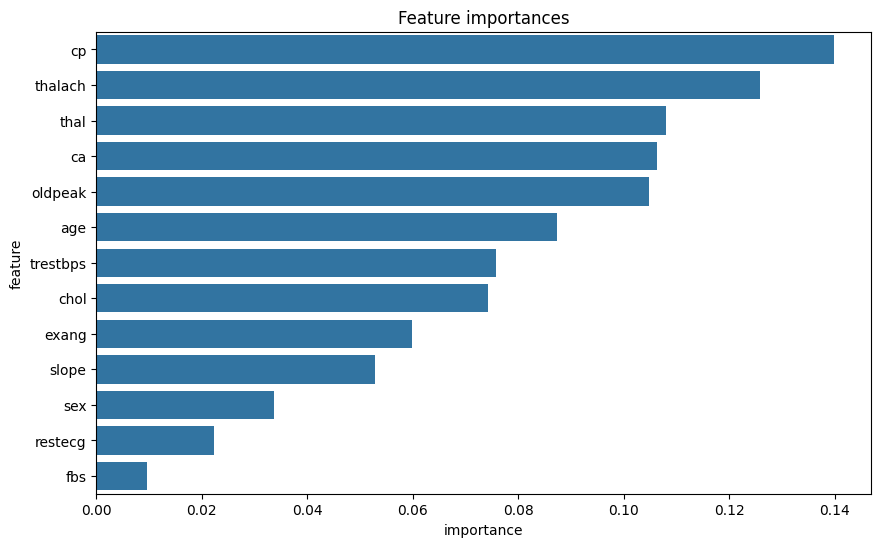

In [ ]:
rf.fit(X,y)
importances = pd.DataFrame({"feature":numerical_features,
                            "importance":rf.feature_importances_})

importances = importances.sort_values('importance', ascending=False)
print(importances)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature',data=importances)
plt.title("Feature importances")

In [ ]:
X=df[['age', 'cp', 'thalach', 'oldpeak', 'thal']]
y=df.iloc[:,-1]

In [ ]:
df['thal'].unique()

array([1, 2, 3, 0])

In [ ]:
df['cp'].unique()

array([3, 2, 1, 0])

In [ ]:
X.head()

,age,cp,thalach,oldpeak,thal
0,63,3,150,2.3,1
1,37,2,187,3.5,2
2,41,1,172,1.4,2
3,56,1,178,0.8,2
4,57,0,163,0.6,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(242, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler as sc
sc=sc()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [ ]:
X_train_scaled

array([[-1.35679832,  0.00809909,  0.53278078, -0.92086403, -0.50904773],
       [ 0.38508599, -0.97189094, -1.75358236, -0.19378705,  1.17848036],
       [-0.92132724,  0.98808912, -0.13967897,  2.3509824 , -0.50904773],
       ...,
       [ 1.58263146,  1.96807914, -0.85696936, -0.82997941, -0.50904773],
       [-0.92132724, -0.97189094, -0.27417092, -0.19378705,  1.17848036],
       [ 0.92942484,  0.00809909,  1.29490183, -0.92086403, -0.50904773]])

In [ ]:
import pickle
with open('Scaler.pkl','wb') as f:
  pickle.dump(sc,f)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.8524590163934426

In [ ]:
a=np.array([43, 3, 0, 3.0, 1]).reshape(1,5)
s=sc.fit_transform(a)

b=model.predict_proba(s)
risk_probability = b[:, 1][0]

print(f"Extracted Risk Probability (P): {risk_probability:.4f}")

Extracted Risk Probability (P): 0.5501


In [ ]:

a_high_risk = np.array([65, 3, 110, 4.0, 2]).reshape(1, -1)


s_high_risk = sc.transform(a_high_risk)


b_high_risk = model.predict_proba(s_high_risk)
risk_probability_high = b_high_risk[:, 1][0]

print(f"Input: {a_high_risk.flatten().tolist()}")


print(f"Extracted Risk Probability (P): {risk_probability:.4f}")

Input: [65.0, 3.0, 110.0, 4.0, 2.0]
Extracted Risk Probability (P): 0.5501


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import joblib

df = pd.read_csv("heart (1).csv")


FEATURE_COLUMNS = ['age', 'cp', 'thalach', 'oldpeak', 'thal']
TARGET_COLUMN = 'target'

X = df[FEATURE_COLUMNS]
y = df[TARGET_COLUMN]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




numerical_features = ['age', 'thalach', 'oldpeak']


categorical_features = ['cp', 'thal']


preprocessor = ColumnTransformer(
    transformers=[

        ('num', StandardScaler(), numerical_features),


        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],

    remainder='drop'
)


dtwin_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])


dtwin_pipeline.fit(X_train, y_train)

pipeline_filename = 'dtwin_full_pipeline.joblib'
joblib.dump(dtwin_pipeline, pipeline_filename)

print(f"\nModel training complete. Test Accuracy: {dtwin_pipeline.score(X_test, y_test):.4f}")
print(f"Full Pipeline saved to '{pipeline_filename}'.")
print("\nThis file must be loaded by your FastAPI service for predictions.")


Model training complete. Test Accuracy: 0.8689
Full Pipeline saved to 'dtwin_full_pipeline.joblib'.

This file must be loaded by your FastAPI service for predictions.


In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from typing import List


PIPELINE_FILE = 'dtwin_full_pipeline.joblib'
try:

    DTWIN_PIPELINE = joblib.load(PIPELINE_FILE)
    print(f"Successfully loaded prediction pipeline: {PIPELINE_FILE}")
except FileNotFoundError:
    print(f"ERROR: Pipeline file '{PIPELINE_FILE}' not found. Please re-run the pipeline creation code.")
    exit()


FEATURE_COLUMNS = ['age', 'cp', 'thalach', 'oldpeak', 'thal']


def get_dtwin_risk_output(raw_input_data: List[float], pipeline: Pipeline) -> dict:
    """
    Takes a single patient's raw 5-feature input, preprocesses it,
    and classifies the risk.
    """

    raw_array = np.array(raw_input_data).reshape(1, -1)
    live_df = pd.DataFrame(raw_array, columns=FEATURE_COLUMNS)

    proba = pipeline.predict_proba(live_df)[0, 0]


    risk_probability = float(proba)
    risk_percentage = round(risk_probability * 100)

    if risk_probability >= 0.65:
        category = "High Risk"
    elif risk_probability >= 0.35:
        category = "Medium Risk"
    else:
        category = "Low Risk"

    return {
        "input_data": raw_input_data,
        "risk_category": category,
        "risk_score_percent": risk_percentage,
        "raw_probability": risk_probability
    }



TEST_CASES = [
    {"name": "1. Average Risk", "data": [45, 2, 175, 0.0, 1]},
    {"name": "2. Medium Risk",  "data": [50, 2, 140, 1.5, 3]},
    {"name": "3. High Risk",    "data": [69, 3, 110, 4.0, 2]}
]



print("\n--- Running Predictions on Test Cases ---")
for case in TEST_CASES:
    result = get_dtwin_risk_output(case['data'], DTWIN_PIPELINE)

    print(f"\n{case['name']} Input: {case['data']}")
    print(f"   Probability (P): {result['raw_probability']:.4f}")
    print(f"   Final Risk:      {result['risk_score_percent']}% {result['risk_category'].upper()}")

Successfully loaded prediction pipeline: dtwin_full_pipeline.joblib

--- Running Predictions on Test Cases ---

1. Average Risk Input: [45, 2, 175, 0.0, 1]
   Probability (P): 0.0949
   Final Risk:      9% LOW RISK

2. Medium Risk Input: [50, 2, 140, 1.5, 3]
   Probability (P): 0.5774
   Final Risk:      58% MEDIUM RISK

3. High Risk Input: [69, 3, 110, 4.0, 2]
   Probability (P): 0.8436
   Final Risk:      84% HIGH RISK


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.pipeline import Pipeline

FEATURE_COLUMNS = ['age', 'cp', 'thalach', 'oldpeak', 'thal']


DTWIN_PIPELINE = joblib.load('dtwin_full_pipeline.joblib')


def get_dtwin_risk_output(raw_input_data: list, pipeline: Pipeline) -> dict:

    raw_array = np.array(raw_input_data).reshape(1, -1)
    live_df = pd.DataFrame(raw_array, columns=FEATURE_COLUMNS)

    proba = pipeline.predict_proba(live_df)[0, 0]

    risk_probability = float(proba)
    risk_percentage = round(risk_probability * 100)

    if risk_probability >= 0.65:
        category = "High Risk"
    elif risk_probability >= 0.35:
        category = "Medium Risk"
    else:
        category = "Average Risk"

    return {
        "risk_category": category,
        "risk_score_percent": risk_percentage,
        "raw_probability": risk_probability
    }

